# <font color='Blue'>Intent Classification </font>                                         

# <font color='Navy Blue'>Author - Bharat Parmar</font> 

## Preprocessing - Train Data

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
tfid = TfidfVectorizer()
vect = CountVectorizer()
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.manifold import TSNE
NB = MultinomialNB()
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

/home/bharat/Anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [136]:
data = pd.read_csv('atis-2.train.w-intent.iob (3).txt', sep=None, header=None)
data.columns = ["a","b"]

/home/bharat/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [138]:
data.head()

,a,b
0,BOS i want to fly from baltimore to dallas rou...,O O O O O O B-fromloc.city_name O B-toloc.city...
1,BOS round trip fares from baltimore to philade...,O B-round_trip I-round_trip O O B-fromloc.city...
2,BOS show me the flights arriving on baltimore ...,O O O O O O O B-toloc.city_name O B-arrive_dat...
3,BOS what are the flights which depart from san...,O O O O O O O O B-fromloc.city_name I-fromloc....
4,BOS which airlines fly from boston to washingt...,O O O O O B-fromloc.city_name O B-toloc.city_n...


In [139]:
len(data)

4478

In [140]:
data['b'][0]

'O O O O O O B-fromloc.city_name O B-toloc.city_name B-round_trip I-round_trip atis_flight'

In [141]:
lst = []
for i in range (0,len(data)):
    pat="(atis_\w+)"
    a=data['b'][i]
    lst.append(re.findall(pat,a)[0])
#print(lst)

In [142]:
myset = set(lst)
print (list(myset))

['atis_airfare', 'atis_abbreviation', 'atis_quantity', 'atis_flight', 'atis_meal', 'atis_city', 'atis_distance', 'atis_ground_fare', 'atis_ground_service', 'atis_restriction', 'atis_cheapest', 'atis_airline', 'atis_airport', 'atis_aircraft', 'atis_flight_no', 'atis_capacity', 'atis_flight_time']


In [143]:
df = pd.DataFrame({'col':lst})
df.head()

,col
0,atis_flight
1,atis_airfare
2,atis_flight
3,atis_flight
4,atis_airline


In [144]:
data['b'] = df

In [145]:
data.columns = ["sent","labels"]
#data.head()

In [146]:
for i in range(0,len(data)):
    pat = "(EOS)"
    
    data['sent'][i] = re.sub(pat,'',data['sent'][i])

In [147]:
for i in range(0,len(data)):
    pat = "(BOS)"
    
    data['sent'][i] = re.sub(pat,'',data['sent'][i])

In [162]:
data.head()

,sent,labels
0,i want to fly from baltimore to dallas round ...,atis_flight
1,round trip fares from baltimore to philadelph...,atis_airfare
2,show me the flights arriving on baltimore on ...,atis_flight
3,what are the flights which depart from san fr...,atis_flight
4,which airlines fly from boston to washington ...,atis_airline


In [163]:
data['labels'].value_counts()

atis_flight            3328
atis_airfare            385
atis_ground_service     231
atis_airline            141
atis_abbreviation       130
atis_aircraft            71
atis_flight_time         45
atis_quantity            41
atis_city                18
atis_airport             17
atis_distance            17
atis_ground_fare         15
atis_capacity            15
atis_flight_no           12
atis_meal                 6
atis_restriction          5
atis_cheapest             1
Name: labels, dtype: int64

In [150]:
#data.to_csv('test.csv', index = 0, header = True)

In [245]:
count = data['labels'].value_counts()
counts = pd.DataFrame({'labels':count.index, 'count':count.values})
#print(counts)

                 labels  count
0           atis_flight   3328
1          atis_airfare    385
2   atis_ground_service    231
3          atis_airline    141
4     atis_abbreviation    130
5         atis_aircraft     71
6      atis_flight_time     45
7         atis_quantity     41
8             atis_city     18
9          atis_airport     17
10        atis_distance     17
11     atis_ground_fare     15
12        atis_capacity     15
13       atis_flight_no     12
14            atis_meal      6
15     atis_restriction      5
16        atis_cheapest      1


Text(0.5,1,'Graph')

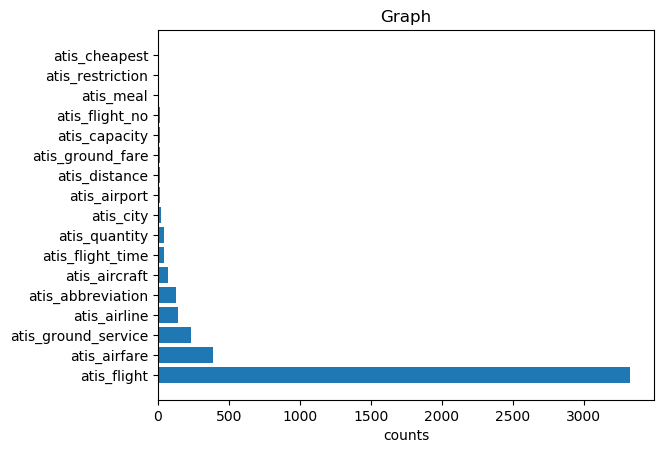

In [262]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = counts['labels']
y_pos = np.arange(len(objects))
performance = counts['count']
 
plt.barh(y_pos, performance, align='center', alpha=1)
plt.yticks(y_pos, objects)
plt.xlabel('counts')
plt.title('Graph')

<BarContainer object of 4478 artists>

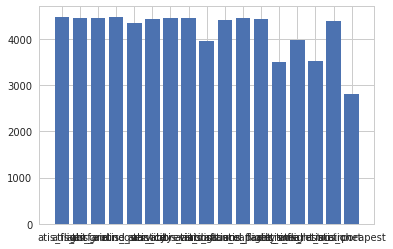

In [151]:
x=np.arange(len(data.labels))
plt.bar(data.labels,x)

## Preprocessing - Test Data

In [152]:
test = pd.read_csv('atis.test.w-intent.iob (2).txt', sep=None, header=None)
test.columns = ["a","b"]

/home/bharat/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [154]:
lst = []
for i in range (0,len(test)):
    pat="(atis_\w+)"
    a=test['b'][i]
    lst.append(re.findall(pat,a)[0])
#print(lst)

In [155]:
df1 = pd.DataFrame({'col':lst})
df1.head()

,col
0,atis_flight
1,atis_airfare
2,atis_flight
3,atis_flight
4,atis_flight


In [156]:
test['b'] = df

In [157]:
test.columns = ["sent","labels"]
#test.head()

In [158]:
for i in range(0,len(test)):
    pat = "(EOS)"
    
    test['sent'][i] = re.sub(pat,'',test['sent'][i])


In [159]:
for i in range(0,len(test)):
    pat = "(BOS)"
    
    test['sent'][i] = re.sub(pat,'',test['sent'][i])

In [164]:
test.head()

,sent,labels
0,i would like to find a flight from charlotte ...,atis_flight
1,on april first i need a ticket from tacoma to...,atis_airfare
2,on april first i need a flight going from pho...,atis_flight
3,i would like a flight traveling one way from ...,atis_flight
4,i would like a flight from orlando to salt la...,atis_airline


In [242]:
count = test['labels'].value_counts()
counts = pd.DataFrame({'labels':count.index, 'count':count.values})
print(counts)

                 labels  count
0           atis_flight    655
1          atis_airfare     80
2   atis_ground_service     42
3          atis_airline     32
4     atis_abbreviation     26
5         atis_aircraft     17
6         atis_quantity     10
7      atis_flight_time      9
8             atis_city      5
9         atis_distance      4
10       atis_flight_no      3
11            atis_meal      3
12         atis_airport      3
13        atis_capacity      2
14     atis_restriction      1
15     atis_ground_fare      1


Text(0.5,1,'Graph')

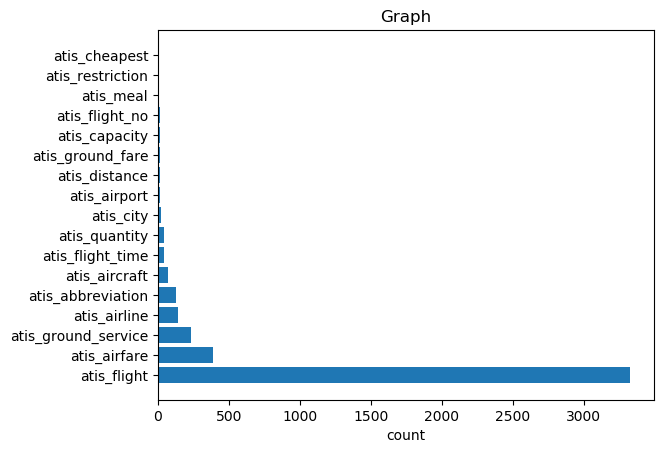

In [266]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
labels = counts['labels']
y_pos = np.arange(len(objects))
cnt = counts['count']
 
plt.barh(y_pos, cnt, align='center', alpha=1)
plt.yticks(y_pos, labels)
plt.xlabel('count')
plt.title('Graph')

## Using BOW (count vectorizer)

## Naive Bayes

In [289]:
x_train = data.sent
y_train = data.labels
x_test = test.sent
y_test = test.labels
x_train_dtm = vect.fit_transform(x_train)
x_test_dtm = vect.transform(x_test)

In [294]:
# from imblearn.over_sampling  import SMOTE
# from collections import Counter
# sm = SMOTE(random_state=12, ratio = 1.0)
# x_train_res, y_train_res = sm.fit_sample(x_train_dtm, y_train)


In [282]:

NB.fit(x_train_dtm,y_train)
y_predict = NB.predict(x_test_dtm)
accuracy = metrics.accuracy_score(y_test,y_predict)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 56.89%


In [251]:
conf_mat = confusion_matrix(y_test, y_predict)
print(conf_mat)

[[  0   0   2   1   0   0   0   0  20   0   0   1   1   0   1   0]
 [  1   0   3   0   0   0   0   0  12   0   0   0   1   0   0   0]
 [  6   0   2   2   0   0   0   0  65   0   0   0   3   0   2   0]
 [  3   0   3   0   0   0   0   0  25   0   0   0   1   0   0   0]
 [  0   0   1   0   0   0   0   0   2   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   5   0   0   0   0   0   0   0]
 [  0   0   1   0   0   0   0   0   3   0   0   0   0   0   0   0]
 [ 34  20  33  13   1   1   1   5 503   0   1   1  34   0   8   0]
 [  0   0   0   0   0   0   0   0   3   0   0   0   0   0   0   0]
 [  1   2   0   0   0   0   0   0   6   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0]
 [  2   1   2   2   0   0   0   0  32   0   0   0   3   0   0   0]
 [  0   0   0   0   0   0   0   0   2   0   0   0   1   0   0   0]
 [  0   0   1   0   0   0   0   0   8   0   0   0   1   0   0 

In [308]:
print("f1_score,precision, recall, average = macro")
print(f1_score(y_test, y_predict, average="macro"))
print(precision_score(y_test, y_predict, average="macro"))
print(recall_score(y_test, y_predict, average="macro")) 
print("f1_score,precision, recall, average = micro")
print(f1_score(y_test, y_predict, average="micro"))
print(precision_score(y_test, y_predict, average="micro"))
print(recall_score(y_test, y_predict, average="micro")) 
print("f1_score,precision, recall, average = weighted")
print(f1_score(y_test, y_predict, average="weighted"))
print(precision_score(y_test, y_predict, average="weighted"))
print(recall_score(y_test, y_predict, average="weighted")) 

f1_score,precision, recall, average = macro
0.053045463875205257
0.052398554668601834
0.054022968920392586
f1_score,precision, recall, average = micro
0.568868980963046
0.568868980963046
0.568868980963046
f1_score,precision, recall, average = weighted
0.5550636610785953
0.5423425004781044
0.568868980963046


/home/bharat/Anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/bharat/Anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Random Forest

In [283]:
#rf = RandomForestClassifier(max_depth=10,max_features=10)
rf = RandomForestClassifier(max_depth=30, min_samples_leaf=1, n_estimators=54)
rf.fit(x_train_dtm,y_train)
rf_predict = rf.predict(x_test_dtm)
accuracy = metrics.accuracy_score(y_test,rf_predict)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 56.33%


In [258]:
conf_mat = confusion_matrix(y_test, rf_predict)
print(conf_mat)

[[  0   0   3   0   0   0   0   0  21   0   0   0   1   0   1   0]
 [  1   0   2   0   0   0   0   0  13   0   0   0   1   0   0   0]
 [  4   0   3   1   1   2   0   0  67   0   0   0   2   0   0   0]
 [  2   0   0   1   1   0   0   0  28   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   3   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0   0   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   5   0   0   0   0   0   0   0]
 [  0   0   1   0   0   0   0   0   3   0   0   0   0   0   0   0]
 [ 24  13  28  23   5  10   0   5 512   0   1   0  28   0   6   0]
 [  0   0   0   0   0   0   0   0   3   0   0   0   0   0   0   0]
 [  1   2   0   0   0   0   0   0   6   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0]
 [  1   1   2   2   0   0   0   0  34   0   0   1   1   0   0   0]
 [  0   0   0   0   0   0   0   0   2   0   0   0   1   0   0   0]
 [  0   0   2   0   0   0   0   0   7   0   0   0   1   0   0 

In [309]:
print("f1_score,precision,recall, average = macro")
print(f1_score(y_test, rf_predict, average="macro"))
print(precision_score(y_test, rf_predict, average="macro"))
print(recall_score(y_test, rf_predict, average="macro")) 
print("f1_score,precision,recall, average = micro")
print(f1_score(y_test, rf_predict, average="micro"))
print(precision_score(y_test, rf_predict, average="micro"))
print(recall_score(y_test, rf_predict, average="micro")) 
print("f1_score,precision,recall, average = weighted")
print(f1_score(y_test, rf_predict, average="weighted"))
print(precision_score(y_test, rf_predict, average="weighted"))
print(recall_score(y_test, rf_predict, average="weighted")) 

f1_score,precision,recall, average = macro
0.052975056643168456
0.053139483289306094
0.05330405420756089
f1_score,precision,recall, average = micro
0.5632698768197089
0.5632698768197089
0.5632698768197089
f1_score,precision,recall, average = weighted
0.5505796866347595
0.539140105807987
0.5632698768197089


/home/bharat/Anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/bharat/Anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [285]:

rfc = RandomForestClassifier(n_jobs=-1, max_features='sqrt', oob_score = True) 
 
# Use a grid over parameters of interest
param_grid = { 
           "n_estimators" : [9, 18, 27, 36, 45, 54, 63],
           "max_depth" : [1, 5, 10, 15, 20, 25, 30],
           "min_samples_leaf" : [1, 2, 4, 6, 8, 10]}
 
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 10)
CV_rfc.fit(x_train_dtm, y_train)
print (CV_rfc.best_params_)

/home/bharat/Anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/home/bharat/Anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/bharat/Anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/bharat/Anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/

/home/bharat/Anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/bharat/Anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/bharat/Anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/bharat/Anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/bharat/Anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs 

/home/bharat/Anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/bharat/Anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/bharat/Anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/bharat/Anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/bharat/Anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs 

/home/bharat/Anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/bharat/Anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/bharat/Anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/bharat/Anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/bharat/Anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs 

KeyboardInterrupt: 

# SVM/SVC

In [284]:
model_ = svm.SVC(gamma= 0.001, C= 1000, kernel= 'rbf')
model_.fit(x_train_dtm,y_train)
svmPredict = model_.predict(x_test_dtm)
accuracy = metrics.accuracy_score(y_test,svmPredict)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 53.42%


In [223]:
#print(svmPredict)

['atis_flight' 'atis_airfare' 'atis_flight' 'atis_flight' 'atis_flight'
 'atis_flight' 'atis_flight' 'atis_flight' 'atis_flight' 'atis_flight'
 'atis_flight' 'atis_flight' 'atis_airfare' 'atis_flight' 'atis_flight'
 'atis_flight' 'atis_flight' 'atis_flight' 'atis_flight' 'atis_flight'
 'atis_flight' 'atis_flight' 'atis_flight' 'atis_flight' 'atis_flight'
 'atis_flight' 'atis_flight' 'atis_flight' 'atis_flight' 'atis_flight'
 'atis_flight' 'atis_flight' 'atis_ground_service' 'atis_flight'
 'atis_flight' 'atis_flight' 'atis_flight' 'atis_flight' 'atis_flight'
 'atis_flight' 'atis_flight' 'atis_flight' 'atis_flight' 'atis_flight'
 'atis_flight' 'atis_flight' 'atis_flight' 'atis_flight' 'atis_flight'
 'atis_flight' 'atis_flight' 'atis_flight' 'atis_flight' 'atis_flight'
 'atis_flight' 'atis_flight' 'atis_flight' 'atis_flight' 'atis_flight'
 'atis_flight' 'atis_flight' 'atis_flight' 'atis_flight' 'atis_flight'
 'atis_flight' 'atis_flight' 'atis_flight' 'atis_flight' 'atis_flight'
 'atis_fli

In [224]:
conf_mat = confusion_matrix(y_test, svmPredict)
print(conf_mat)

[[  0   0   3   0   1   0   0   0  19   0   0   1   1   0   1   0]
 [  1   0   2   0   1   0   0   0  12   0   0   0   1   0   0   0]
 [  4   0   4   2   1   2   0   0  63   0   0   1   2   0   1   0]
 [  2   0   1   3   2   0   0   0  23   0   0   0   1   0   0   0]
 [  0   0   0   0   0   0   0   0   3   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0   0   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   5   0   0   0   0   0   0   0]
 [  0   0   1   0   0   0   0   0   3   0   0   0   0   0   0   0]
 [ 25  11  39  34  14  14   0   8 469   0   1   2  29   3   6   0]
 [  0   0   0   0   0   0   0   0   3   0   0   0   0   0   0   0]
 [  1   2   0   0   0   0   0   0   6   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0]
 [  1   1   3   2   0   0   0   1  32   0   0   1   1   0   0   0]
 [  0   0   0   0   0   0   0   0   2   0   0   0   1   0   0   0]
 [  0   0   2   0   0   0   0   0   7   0   0   0   1   0   0 

In [310]:
print("f1_score,precision,recall, average = macro")
print(f1_score(y_test, svmPredict, average="macro"))
print(precision_score(y_test, svmPredict, average="macro"))
print(recall_score(y_test, svmPredict, average="macro")) 
print("f1_score,precision,recall, average = micro")
print(f1_score(y_test, svmPredict, average="micro"))
print(precision_score(y_test, svmPredict, average="micro"))
print(recall_score(y_test, svmPredict, average="micro")) 
print("f1_score,precision,recall, average = weighted")
print(f1_score(y_test, svmPredict, average="weighted"))
print(precision_score(y_test, svmPredict, average="weighted"))
print(recall_score(y_test, svmPredict, average="weighted")) 

f1_score,precision,recall, average = macro
0.055276921399793504
0.0557950832950833
0.05522437863504181
f1_score,precision,recall, average = micro
0.5341545352743561
0.5341545352743561
0.5341545352743561
f1_score,precision,recall, average = weighted
0.5366131705940383
0.53958199725277
0.5341545352743561


/home/bharat/Anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/bharat/Anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Grid Search for SVM


In [200]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import classification_report
# tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
#                      'C': [1, 10, 100, 1000]},
#                     {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

# scores = ['precision', 'recall']

# for score in scores:
#     print("# Tuning hyper-parameters for %s" % score)
#     print()

#     clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
#                        scoring='%s_macro' % score)
#     clf.fit(x_train_dtm, y_train)

#     print("Best parameters set found on development set:")
#     print()
#     print(clf.best_params_)
#     print()
#     print("Grid scores on development set:")
#     print()
#     means = clf.cv_results_['mean_test_score']
#     stds = clf.cv_results_['std_test_score']
#     for mean, std, params in zip(means, stds, clf.cv_results_['params']):
#         print("%0.3f (+/-%0.03f) for %r"
#               % (mean, std * 2, params))
#     print()

#     print("Detailed classification report:")
#     print()
#     print("The model is trained on the full development set.")
#     print("The scores are computed on the full evaluation set.")
#     print()
#     y_true, y_pred = y_test, clf.predict(x_test_dtm)
#     print(classification_report(y_true, y_pred))
#     print()


# Tuning hyper-parameters for precision



/home/bharat/Anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/home/bharat/Anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/bharat/Anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/bharat/Anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted'

KeyboardInterrupt: 

## Xgboost classifier

In [216]:
model = XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=10,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'multi:softprob',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
model.fit(x_train_dtm, y_train)
# make predictions for test data
y_pred = model.predict(x_test_dtm)
#predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 54.31%


/home/bharat/Anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [217]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[  0   0   3   0   0   0   0   0  19   0   0   1   2   0   1   0]
 [  1   0   2   0   1   0   0   0  12   0   0   0   1   0   0   0]
 [  4   0   3   2   1   2   1   0  63   0   0   1   2   0   1   0]
 [  2   0   1   2   1   0   0   0  25   0   0   0   1   0   0   0]
 [  0   0   0   0   0   0   0   0   3   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0   0   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   5   0   0   0   0   0   0   0]
 [  0   0   1   0   0   0   0   0   3   0   0   0   0   0   0   0]
 [ 24  14  37  30  14   9   2   7 479   0   1   2  29   0   7   0]
 [  0   0   0   0   0   0   0   0   3   0   0   0   0   0   0   0]
 [  1   2   0   0   0   0   0   0   6   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0]
 [  1   1   3   3   0   0   1   0  31   0   0   1   1   0   0   0]
 [  0   0   0   0   0   0   0   0   2   0   0   0   1   0   0   0]
 [  0   0   2   0   0   0   0   0   7   0   0   0   1   0   0 

## Using TF-IDF Vectorizer

In [281]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
# x = vectorizer.fit_transform(data.sent)
# print(vectorizer.get_feature_names())
# print(X.shape)

x_train = data.sent
y_train = data.labels
x_test = test.sent
y_test = test.labels
x_train_dtm1 = vectorizer.fit_transform(x_train)
x_test_dtm1 = vectorizer.transform(x_test)
NB.fit(x_train_dtm1,y_train)
y_predict = NB.predict(x_test_dtm)
accuracy = metrics.accuracy_score(y_test,y_predict)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 65.17%


In [280]:
rf = RandomForestClassifier(max_depth=30, min_samples_leaf=1, n_estimators=54)
rf.fit(x_train_dtm1,y_train)
rf_predict = rf.predict(x_test_dtm1)
accuracy = metrics.accuracy_score(y_test,rf_predict)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 56.89%


In [279]:
model_ = svm.SVC(gamma= 0.001, C= 1000, kernel= 'rbf')
model_.fit(x_train_dtm1,y_train)
svmPredict = model_.predict(x_test_dtm1)
accuracy  = metrics.accuracy_score(y_test,svmPredict)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 53.53%


In [278]:
model = XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=10,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'multi:softprob',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
model.fit(x_train_dtm1, y_train)
# make predictions for test data
y_pred = model.predict(x_test_dtm1)
#predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 55.21%


/home/bharat/Anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [312]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/bharat/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [329]:
from nltk.corpus import stopwords
data["sent"] = test["sent"].str.lower().str.split()


In [330]:
stop = stopwords.words('english')
data['sent'].apply(lambda x: [item for item in x if item not in stop])

TypeError: 'float' object is not iterable

In [6]:
embeddings_index = {}
for i, line in enumerate(open('glove.6B.200d.txt')):
    values = line.split()
    embeddings_index[values[0]] = np.asarray(values[1:], dtype='float32')

In [7]:
# create a tokenizer 
token = text.Tokenizer()
token.fit_on_texts(data['sent'])
word_index = token.word_index

# convert text to sequence of tokens and pad them to ensure equal length vectors 
train_seq_x = sequence.pad_sequences(token.texts_to_sequences(train_x), maxlen=70)
valid_seq_x = sequence.pad_sequences(token.texts_to_sequences(valid_x), maxlen=70)

# create token-embedding mapping
embedding_matrix = np.zeros((len(word_index) + 1, 300))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

NameError: name 'text' is not defined